   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None
Descripción del dataset:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.7

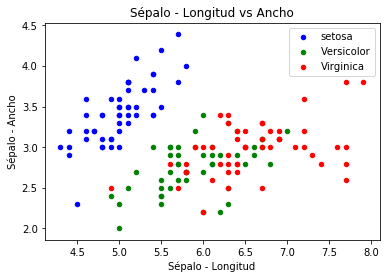

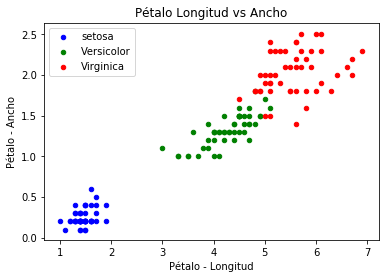

Son 120 datos para entrenamiento y 30 datos para prueba
Precisión Regresión Logística: 0.9666666666666667
Precisión Máquinas de Vectores de Soporte: 0.9916666666666667
Precisión Vecinos más Cercanos: 0.975
Precisión Árboles de Decisión Clasificación: 1.0


Son 120 datos sépalo para entrenamiento y 30 datos sépalo para prueba
Precisión Regresión Logística - Sépalo: 0.7166666666666667
Precisión Máquinas de Vectores de Soporte - Sépalo: 0.825
Precisión Vecinos más Cercanos - Sépalo: 0.8833333333333333
Precisión Árboles de Decisión Clasificación - Sépalo: 0.9416666666666667


Son 120 datos pétalo para entrenamiento y 30 datos pétalo para prueba
Precisión Regresión Logística - Pétalo: 0.8
Precisión Máquinas de Vectores de Soporte - Pétalo: 0.9666666666666667
Precisión Vecinos más Cercanos - Pétalo: 0.9583333333333334
Precisión Árboles de Decisión Clasificación - Pétalo: 1.0


C:\Users\hq_admin15\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hq_admin15\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hq_admin15\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hq_admin15\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 

In [25]:
#Basado en http://ligdigonzalez.com/portfolio/machine-learning-clasificador-flor-iris-python/

########## LIBRERÍAS A UTILIZAR ##########
import numpy as np
import pandas as pd 

########## IMPORTAMOS LOS DATOS ##########
#Importamos el dataset para iniciar el análisis
iris = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
#Visualizamos los primeros 5 datos del dataset
print(iris.head())


########## ANALIZAMOS LOS DATOS ##########
#Análizamos los datos que tenemos disponibles
print('Información del dataset:')
print(iris.info())
print('Descripción del dataset:')
print(iris.describe())
print('Distribución de las especies de Iris:')
print(iris.groupby('species').size())

########## VISUALIZAMOS LOS DATOS ##########
import matplotlib.pyplot as plt
#Grafico Sepal - Longitud vs Ancho
fig = iris[iris.species == 'setosa'].plot(kind='scatter', 
          x='sepal_length', y='sepal_width', color='blue', label='setosa')
iris[iris.species == 'versicolor'].plot(kind='scatter', 
    x='sepal_length', y='sepal_width', color='green', label='Versicolor', ax=fig)
iris[iris.species == 'virginica'].plot(kind='scatter', 
    x='sepal_length', y='sepal_width', color='red', label='Virginica', ax=fig)
fig.set_xlabel('Sépalo - Longitud')
fig.set_ylabel('Sépalo - Ancho')
fig.set_title('Sépalo - Longitud vs Ancho')
plt.show()
#Grafico Pétalo - Longitud vs Ancho
fig = iris[iris.species == 'setosa'].plot(kind='scatter', 
          x='petal_length', y='petal_width', color='blue', label='setosa')
iris[iris.species == 'versicolor'].plot(kind='scatter', 
    x='petal_length', y='petal_width', color='green', 
    label='Versicolor', ax=fig)
iris[iris.species == 'virginica'].plot(kind='scatter', 
    x='petal_length', y='petal_width', color='red', label='Virginica', ax=fig)
fig.set_xlabel('Pétalo - Longitud')
fig.set_ylabel('Pétalo - Ancho')
fig.set_title('Pétalo Longitud vs Ancho')
plt.show()

########## APLICACIÓN DE ALGORITMOS DE MACHINE LEARNING ##########
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
##################################################################
########## MODELO CON TODOS LOS DATOS
#Separo todos los datos con las características y las etiquetas o resultados
X = np.array(iris.drop(['species'], 1))
y = np.array(iris['species'])
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))
#Modelo de Regresión Logística
algoritmo = LogisticRegression()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Regresión Logística: {}'.format(algoritmo.score(X_train, y_train)))
#Modelo de Máquinas de Vectores de Soporte
algoritmo = SVC()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Máquinas de Vectores de Soporte: {}'.format(algoritmo.score(X_train, y_train)))
#Modelo de Vecinos más Cercanos
algoritmo = KNeighborsClassifier(n_neighbors=5)
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Vecinos más Cercanos: {}'.format(algoritmo.score(X_train, y_train)))
#Modelo de Árboles de Decisión Clasificación
algoritmo = DecisionTreeClassifier()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Árboles de Decisión Clasificación: {}'.format(algoritmo.score(X_train, y_train)))
print()
print()
##################################################################
########## MODELO CON DATOS DE SÉPALO
#Separo todos los datos con las características y las etiquetas o resultados
sepalo = iris[['sepal_length','sepal_width','species']]
X_sepalo = np.array(sepalo.drop(['species'], 1))
y_sepalo = np.array(sepalo['species'])
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sepalo, y_sepalo, test_size=0.2)
print('Son {} datos sépalo para entrenamiento y {} datos sépalo para prueba'.format(X_train.shape[0], X_test.shape[0]))
#Modelo de Regresión Logística
algoritmo = LogisticRegression()
algoritmo.fit(X_train_s, y_train_s)
Y_pred = algoritmo.predict(X_test_s)
print('Precisión Regresión Logística - Sépalo: {}'.format(algoritmo.score(X_train_s, y_train_s)))
#Modelo de Máquinas de Vectores de Soporte
algoritmo = SVC()
algoritmo.fit(X_train_s, y_train_s)
Y_pred = algoritmo.predict(X_test_s)
print('Precisión Máquinas de Vectores de Soporte - Sépalo: {}'.format(algoritmo.score(X_train_s, y_train_s)))
#Modelo de Vecinos más Cercanos
algoritmo = KNeighborsClassifier(n_neighbors=5)
algoritmo.fit(X_train_s, y_train_s)
Y_pred = algoritmo.predict(X_test_s)
print('Precisión Vecinos más Cercanos - Sépalo: {}'.format(algoritmo.score(X_train_s, y_train_s)))
#Modelo de Árboles de Decisión Clasificación
algoritmo = DecisionTreeClassifier()
algoritmo.fit(X_train_s, y_train_s)
Y_pred = algoritmo.predict(X_test_s)
print('Precisión Árboles de Decisión Clasificación - Sépalo: {}'.format(algoritmo.score(X_train_s, y_train_s)))
print()
print()
##################################################################
########## MODELO CON DATOS DE PÉTALO
#Separo todos los datos con las características y las etiquetas o resultados
petalo = iris[['petal_length','petal_width','species']]
X_petalo = np.array(petalo.drop(['species'], 1))
y_petalo = np.array(petalo['species'])
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_petalo, y_petalo, test_size=0.2)
print('Son {} datos pétalo para entrenamiento y {} datos pétalo para prueba'.format(X_train.shape[0], X_test.shape[0]))
#Modelo de Regresión Logística
algoritmo = LogisticRegression()
algoritmo.fit(X_train_p, y_train_p)
Y_pred = algoritmo.predict(X_test_p)
print('Precisión Regresión Logística - Pétalo: {}'.format(algoritmo.score(X_train_p, y_train_p)))
#Modelo de Máquinas de Vectores de Soporte
algoritmo = SVC()
algoritmo.fit(X_train_p, y_train_p)
Y_pred = algoritmo.predict(X_test_p)
print('Precisión Máquinas de Vectores de Soporte - Pétalo: {}'.format(algoritmo.score(X_train_p, y_train_p)))
#Modelo de Vecinos más Cercanos
algoritmo = KNeighborsClassifier(n_neighbors=5)
algoritmo.fit(X_train_p, y_train_p)
Y_pred = algoritmo.predict(X_test_p)
print('Precisión Vecinos más Cercanos - Pétalo: {}'.format(algoritmo.score(X_train_p, y_train_p)))
#Modelo de Árboles de Decisión Clasificación
algoritmo = DecisionTreeClassifier()
algoritmo.fit(X_train_p, y_train_p)
Y_pred = algoritmo.predict(X_test_p)
print('Precisión Árboles de Decisión Clasificación - Pétalo: {}'.format(algoritmo.score(X_train_p, y_train_p)))